# Reigman Real Estate Analysis

## 1.Business Understanding

Reigman Real Estate is a real estate company situated in King County and they primarily deal in buying and selling of properties.In order to make well informed decisions on what type of house should be sold or bought, the company has sought out a data scientist to help them make profitable decisions based off the available data on housing sales in the region.The aim is to find which factors influence the pricing of houses and by how much

## 2.Data Understanding

The data available to us is the King County house sales dataset which contains columns that are different properties related to a house.The dataset has a data dictionary which has a breif description of column content:

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Now we can load our data and have a look at it

In [169]:
# Import libraries to be used
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Load the csv file into a pandas dataframe
housing = pd.read_csv("data/kc_house_data.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [170]:
housing.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [171]:
# Get further decription on columns and rows 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [172]:
# Take a look at the categorical data
categoricals = housing.select_dtypes("object")
categoricals.drop("sqft_basement", axis= 1, inplace= True)
for col in categoricals:
    print(housing[col].value_counts(), "\n")

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/30/2014       1
8/3/2014        1
1/31/2015       1
1/10/2015       1
11/30/2014      1
Name: date, Length: 372, dtype: int64 

NO     19075
YES      146
Name: waterfront, dtype: int64 

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 



c:\Users\mponz\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [173]:
# Look at the descriptive characteristics of the columns
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [174]:
print('The King County house sale dataset has ' + str(housing.shape[0]) + ' rows and ' + str(housing.shape[1]) + 'columns')

The King County house sale dataset has 21597 rows and 21columns



## 3.Data Preperation

Now that we understand what the dataset contains we can begin cleaning inorder to get the best results for our analysis and modeling


In [175]:
# Drop the id and date column since there is no use for it
housing.drop(["id", "date"], axis= 1, inplace= True)

In [176]:
# Check for missing values
housing.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For the missing values in waterfront and view, the most appropriate way to deal with them is replacing the null values with the most common value in the column 

In [177]:
# Find the most common value
housing.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [178]:
# Replace the null values
housing['waterfront'].fillna('NO', inplace= True)
housing.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [179]:
# Find the most common value
housing.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [180]:
# Replace the null values
housing['view'].fillna('NONE', inplace= True)
housing.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

For the yr_renovated column the best way to deal with the null values is to drop them replacing the values might have substantial negative effect on the outcome of our analysis

In [181]:
# Drop the null values in yr_renovated and chech to see if there are anymore null values in the dataset
housing.dropna(subset= ['yr_renovated']).isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4.Modeling

The purpose of modeling is to enable us to predict values based off the available data.The column we are most intrested in is price and we would like to see how the other features of a house affect it.

Before doing so we check the correlation between price and other house features

In [182]:
# Look at the pearsons coefficient
housing.corr()["price"]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

From the information above we see that sqft_living has the strongest positive correlation with price at 0.7 and yr built has the weakest positive correlation at 0.5.This means that changing the sqft_living values has a greater effect on the house price compared to changing the year the house was built.

To get further insight on the correlation a scatter plot can be used

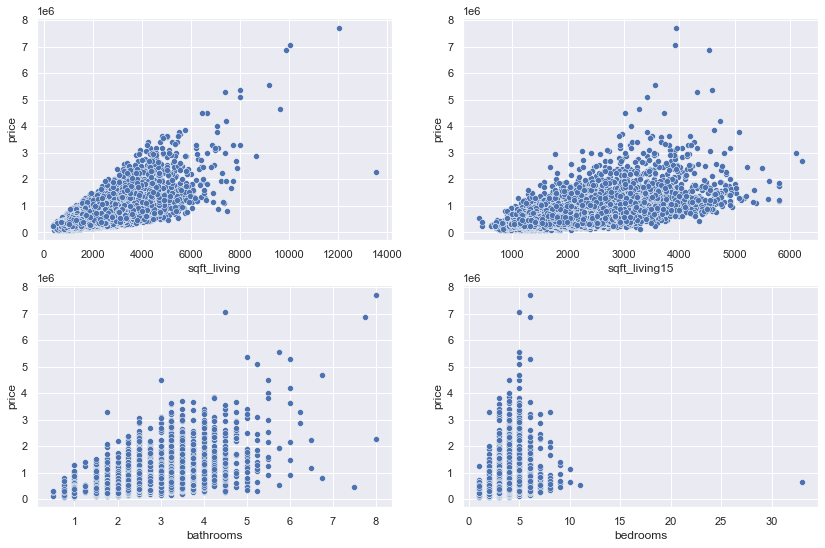

In [183]:

h_price = housing["price"]
living = housing["sqft_living"]
neighbor = housing["sqft_living15"]
bathrooms = housing["bathrooms"]
bedrooms = housing["bedrooms"]

fig, ax =plt.subplots(2,2, figsize= (14,9))
sns.scatterplot(x=living, y=h_price ,ax= ax[0,0])
sns.scatterplot(x=neighbor, y=h_price ,ax= ax[0,1])
sns.scatterplot(x=bathrooms, y=h_price ,ax= ax[1,0])
sns.scatterplot(x=bedrooms, y=h_price ,ax= ax[1,1]);

As it was show by the Pearson's coefficient there is a positive correlation between price and the above columns, this gives us the go ahead to make models that predict values

Before we start the modeling we have to take a look at the distribution of variables in the dataset.Knowing this we can improve the performance of our model

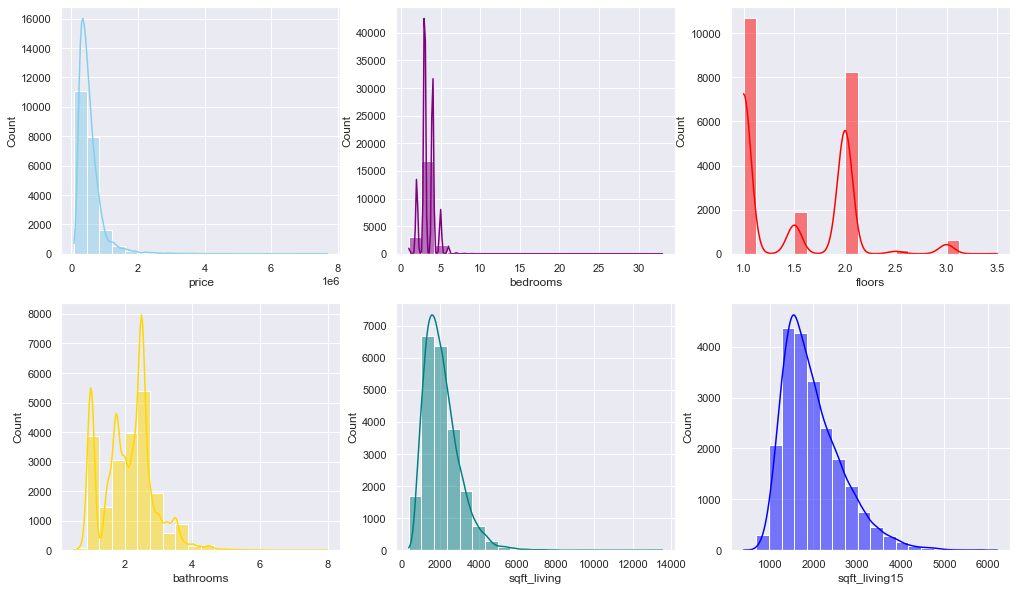

In [184]:
# Plot kde and histograms together for columns we are intrested in
fig,axs = plt.subplots(2,3, figsize= (17, 10))
sns.histplot(data=housing, x="price", bins=20, kde= True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=housing, x="bedrooms", bins= 20, kde= True, color="purple", ax=axs[0, 1])
sns.histplot(data=housing, x="bathrooms", bins= 20, kde= True, color="gold", ax=axs[1, 0])
sns.histplot(data=housing, x="sqft_living", bins= 20, kde= True, color="teal", ax=axs[1, 1])
sns.histplot(data=housing, x="floors", bins= 20, kde= True, color="red", ax=axs[0, 2])
sns.histplot(data=housing, x="sqft_living15", bins= 20, kde= True, color="blue", ax=axs[1, 2]);


From the above visualisation we see that the columns do not have a normal distribution and that they are skewed.This skewness indicates presence of outliers in the columns and these can reduce the performance of the model


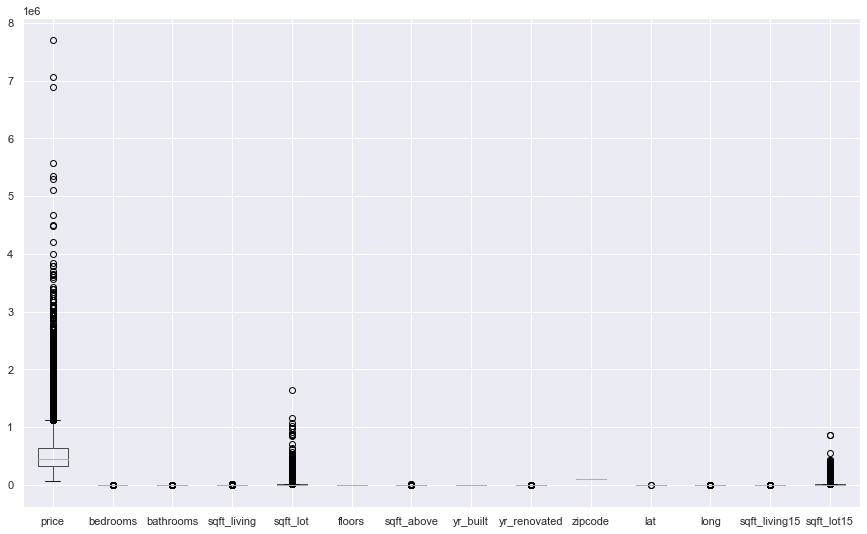

In [185]:
# Check for outliers using a boxplot 
housing.boxplot(figsize= (15,9));

In [186]:
# Find the number of outliers present
tf = housing['price'].quantile(.25)
sf = housing['price'].quantile(.75)
IQR = sf - tf 
outliers = housing[(housing.price < tf - 1.5* IQR)  |
                    (housing.price > sf + 1.5 * IQR) ]

tf2 = housing['sqft_living15'].quantile(.25)
sf2 = housing['sqft_living15'].quantile(.75)
IQR2 = sf2 - tf2 
outliers2 = housing[(housing.sqft_living15 < tf2 - 1.5* IQR2)  |
                    (housing.sqft_living15 > sf2 + 1.5 * IQR2) ]                    
print('Number of outliers in price: ' + str(outliers.price.count()))
print('Number of outliers in sqft_living15: ' + str(outliers2.sqft_living15.count()))

Number of outliers in price: 1158
Number of outliers in sqft_living15: 543


The presence of outliers will make our model less precise but not biased if you are using a linear model 

Make the linear regression model using price as the dependent variable and sqft_living as the independent variable inoreder to get the coefficient and y-intercept

In [187]:
#Create a linear regression
y = h_price
X_baseline = living

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:45:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [188]:
# look for the mean absolute error
mae = baseline_results.resid.abs().sum()/ len(X_baseline)
mae

173824.88749617487

The R-squared of the model is 0.49 meanig 49% of the variance in price and it is statistically significant and the models prediction is off by $173824

The constant and sqft_living coefficient are about -$43990  and 281 respectively and they are both statistically significant.Hence the formula to predict price based off of sqft_livin is
###         price = 281*sqft_living - 43990

Below we visualize the results

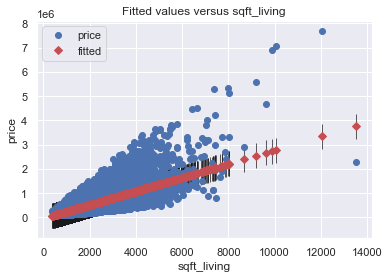

In [189]:
# Plot actual results and predicted
sm.graphics.plot_fit(baseline_results, "sqft_living",)
plt.show()

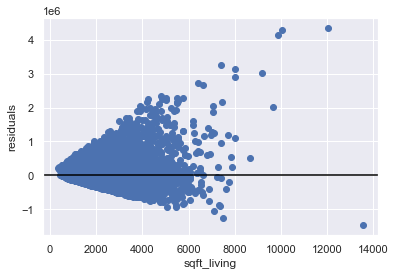

In [190]:
# plot the residuals 
fig, ax = plt.subplots()

ax.scatter(living, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

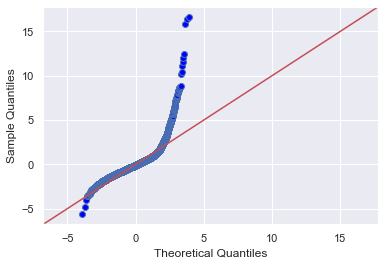

In [191]:
# Make a ggplot
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()


The ggplot shows us that it would have been best suited to make a polynomial regression for the price and sqft_living since more variance would have been covered

We are now intrested in making a multilinear model for all the other features we are intrested in and see how they affect the price.This can be made possible by the first linear regression which will become the baseline.First we take a look at the categorical data

c:\Users\mponz\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


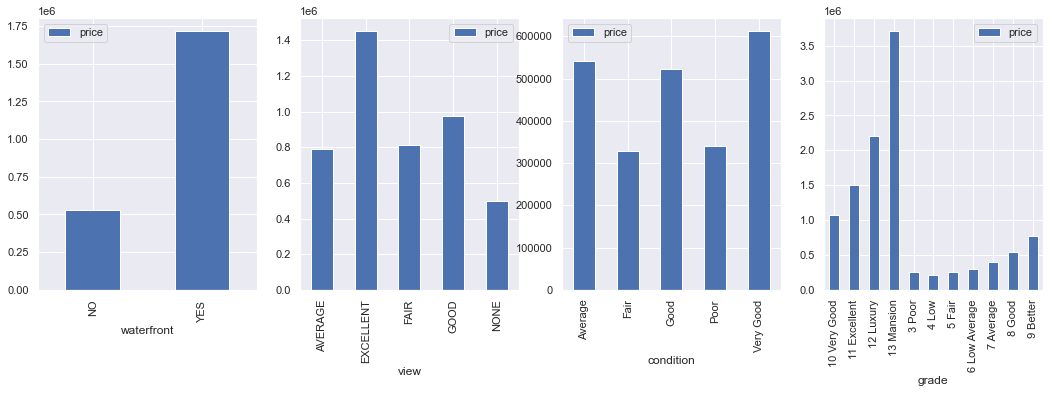

In [192]:
# Visualize distribution
categoricals.drop("date", axis=1, inplace=True)
categorical_cols = categoricals.columns
fig, axes = plt.subplots(ncols=len(categorical_cols), figsize=(18,5))

for index, feature in enumerate(categorical_cols):
    housing.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])


Grade seems to give us more information on the house so we will choose that as the categorical column and combine it with sqft_living and sqft_living15

In [193]:
X_multi = housing[
    ['sqft_living', 'sqft_living15', 'grade']
    ]

In [194]:
# Make dummies for the categiorical data
X_multi = pd.get_dummies(X_multi, columns= ['grade'])
X_multi

,sqft_living,sqft_living15,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,1340,0,0,0,0,0,0,0,0,1,0,0
1,2570,1690,0,0,0,0,0,0,0,0,1,0,0
2,770,2720,0,0,0,0,0,0,0,1,0,0,0
3,1960,1360,0,0,0,0,0,0,0,0,1,0,0
4,1680,1800,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1530,0,0,0,0,0,0,0,0,0,1,0
21593,2310,1830,0,0,0,0,0,0,0,0,0,1,0
21594,1020,1020,0,0,0,0,0,0,0,0,1,0,0
21595,1600,1410,0,0,0,0,0,0,0,0,0,1,0


In [195]:
# To avoid multicolinearity drop pick a refrence column and drop it
X_multi.drop('grade_7 Average', axis = 1, inplace= True)
X_multi

,sqft_living,sqft_living15,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,1180,1340,0,0,0,0,0,0,0,0,0,0
1,2570,1690,0,0,0,0,0,0,0,0,0,0
2,770,2720,0,0,0,0,0,0,0,1,0,0
3,1960,1360,0,0,0,0,0,0,0,0,0,0
4,1680,1800,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1530,0,0,0,0,0,0,0,0,1,0
21593,2310,1830,0,0,0,0,0,0,0,0,1,0
21594,1020,1020,0,0,0,0,0,0,0,0,0,0
21595,1600,1410,0,0,0,0,0,0,0,0,1,0


In [196]:
# Make the multi linear model
multi_model = sm.OLS(y, sm.add_constant(X_multi))
multi_model_results = multi_model.fit()

multi_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2505.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:45:29   Log-Likelihood:            -2.9797e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21584   BIC:                         5.961e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.217e+05   6694.128     18.183      0.000    1.09e+05    1.35e+05
sqft_living           151.8612      3.131     48.501      0.000     145.724     157.998
sqft_living15          14.4732      3.859      3.751      0.000       6.910      22.036
grade_10 Very Good   3.721e+05   9423.593     39.484      0.000    3.54e+05    3.91e+05
grade_11 Excellent   6.575e+05   1.47e+04     44.833      0.000    6.29e+05    6.86e+05
grade_12 Luxury      1.192e+06   2.76e+04     43.144      0.000    1.14e+06    1.25e+06
grade_13 Mansion     2.395e+06   6.79e+04     35.279      0.000    2.26e+06    2.53e+06
grade_3 Poor         4.192e+04   2.38e+05      0.176      0.860   -4.24e+05    5.08e+05
grade_4 Low         -3.461e+04   4.59e+04     -0.754      0.451   -1.25e+05    5.53e+04
grade_5 Fair         -4.25e+04   1.56e+04     -2.725      0.006   -7.31e+04   -1.19e+04
grade_6 Low Average -2.086e+04   6005.051     -3.474      0.001   -3.26e+04   -9090.140
grade_8 Good         5.956e+04   4255.342     13.998      0.000    5.12e+04    6.79e+04
grade_9 Better       1.786e+05   6502.043     27.474      0.000    1.66e+05    1.91e+05
==============================================================================
Omnibus:                    13903.116   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           482997.088
Skew:                           2.581   Prob(JB):                         0.00
Kurtosis:                      25.585   Cond. No.                     4.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
mae = multi_model_results.resid.abs().sum()/ len(X_baseline)
mae

156659.7038237349

The overall model is statistically significant having an adjusted r-squared of about 60 meaning that 60% of the variance in price is covered.In predictions the model is of by $156659.

From the constant and coefficients of the column the price can be predicted by multiplying the associate value from a column with its coefficient getting the sum of all the features and their associated values and adding the constant


## 5.Regression Results

Comparing the two models the multilinear model did better beacause it covers about 60% of the variance in price while the baseline model covers about 50% .Also the multilinear models predictions are off by $156659 and baseline model is off by $173824.Our recommendations will be based off the multilinear model

All coefficients in the multilinear model are statistically significant apart from grade_3 Poor and grade_4 Low 

* The intercept is at about $121700. This means that a house with a
  `grade` of 7(average) would sell for $121700.
* The coefficient for `sqft_living` is about $152. This means for each additional squared foot increase,
  the house costs about $152 more.
* The coefficient for `sqft_living15` is about $14. This means for each additional squared foot increase for the nearest 15 neighbours,
  the house costs about $173 more.
* The coefficients for `grade` range from about $2395000 to about -$42500
  * For a grade of "5(fair)" compared to a grade of "7(average)", we expect -$42500 price
  * For a grade of "6(low average)" compared to a grade of "7(average)", we expect -$20860 price
  * For a grade of "8(good)" compared to a grade of "7(average)", we expect +$59560 price
  * For a grade of "9(better)" compared to a grade of "7(average)", we expect +$178600 price
  * For a grade of "10(very good)" compared to a grade of "7(average)", we expect +$372100 price
  * For a grade of "11(excellent)" compared to a grade of "7(average)", we expect +$657500 price
  * For a grade of "12(luxury)" compared to a grade of "7(average)", we expect +$1192000 price
  * For a grade of "13(mansion)" compared to a grade of "7(average)", we expect +$2395000 price

 